### 1. Setup


In [3]:
import numpy as np
import matplotlib.pyplot as plt

### 2. Dummy Dataset
100 random examples of income data.\
mean = 50,000\
standard deviation = 5,000

In [4]:
# Generate synthetic income data
true_incomes = np.random.normal(loc=50000, scale=5000, size=100)
true_mean = np.mean(true_incomes)

print(f"True mean income: ${true_mean:,.2f}")

True mean income: $49,588.28


### 3. Laplace Mechanism

#### 3.1 Sensitivity
- sensitivity: how much the function's output can change by modifying a single input record
- global sensitivity:
$$∆ƒ=(b-a)/n$$

In [5]:
def global_sensitivity(a, b, n):
    return (b - a) / n

lower_bound = 0
upper_bound = 100000
n = len(true_incomes)
sensitivity_mean = global_sensitivity(lower_bound, upper_bound, n)

print(f"Sensitivity of the mean (assuming incomes in [{lower_bound}, {upper_bound}]): {sensitivity_mean}")

Sensitivity of the mean (assuming incomes in [0, 100000]): 1000.0


#### 3.2 Adding Laplacian Noise
- $∆ƒ$ is the sensitivity
- $ε$ (epsilon) is the privacy budget. Smaller $ε$ means more noise (more privacy but less accuracy).

In [6]:
def laplace_noise(sensitivity, epsilon):
    """
    Draw a single sample from a Laplace distribution with mean=0
    and scale = sensitivity / epsilon
    """
    scale = sensitivity / epsilon
    return np.random.laplace(loc=0.0, scale=scale)

#### 3.3 Differentially Private Mean
Compute the mean with noise added

In [7]:
def dp_mean(data, epsilon, sensitivity):
    """
    Compute the mean of 'data' and add Laplace noise
    """
    # 1. Compute the real mean
    real_mean = np.mean(data)
    
    # 2. Sample noise from Laplace distribution
    noise = laplace_noise(sensitivity, epsilon)
    
    # 3. Return the "private" mean
    return real_mean + noise

### 4. Experimenting with Different Noise
Let's see how adding different noise (epsilon) affects the mean.
- When $𝜖 = 0.01$ we expect large noise.
- When $ϵ = 100$ we expect minimal noise.

In [8]:
epsilons = np.logspace(-2, 2, 10)  # smaller => more noise
print(f"Epsilon values: ", epsilons)
dp_means = []

for eps in epsilons:
    dp_means.append(dp_mean(true_incomes, eps, sensitivity_mean))

for eps, val in zip(epsilons, dp_means):
    print(f"Epsilon = {eps:<5} => DP mean = ${val:,.2f}")
print(f"\nTrue mean = ${true_mean:,.2f}")

Epsilon values:  [1.00000000e-02 2.78255940e-02 7.74263683e-02 2.15443469e-01
 5.99484250e-01 1.66810054e+00 4.64158883e+00 1.29154967e+01
 3.59381366e+01 1.00000000e+02]
Epsilon = 0.01  => DP mean = $-37,866.89
Epsilon = 0.027825594022071243 => DP mean = $15,651.82
Epsilon = 0.0774263682681127 => DP mean = $70,658.64
Epsilon = 0.21544346900318834 => DP mean = $51,562.16
Epsilon = 0.5994842503189409 => DP mean = $49,664.76
Epsilon = 1.6681005372000592 => DP mean = $50,215.52
Epsilon = 4.6415888336127775 => DP mean = $50,481.98
Epsilon = 12.915496650148826 => DP mean = $49,591.17
Epsilon = 35.93813663804626 => DP mean = $49,639.67
Epsilon = 100.0 => DP mean = $49,606.53

True mean = $49,588.28


In [9]:
num_trials = 1000  # how many times we sample noise for each epsilon

avg_dp_means = []
std_dp_means = []

for eps in epsilons:
    dp_estimates = []
    for _ in range(num_trials):
        dp_estimates.append(dp_mean(true_incomes, eps, sensitivity_mean))
    # Store the average and standard deviation
    avg_dp_means.append(np.mean(dp_estimates))
    std_dp_means.append(np.std(dp_estimates))


### 5. Visualization

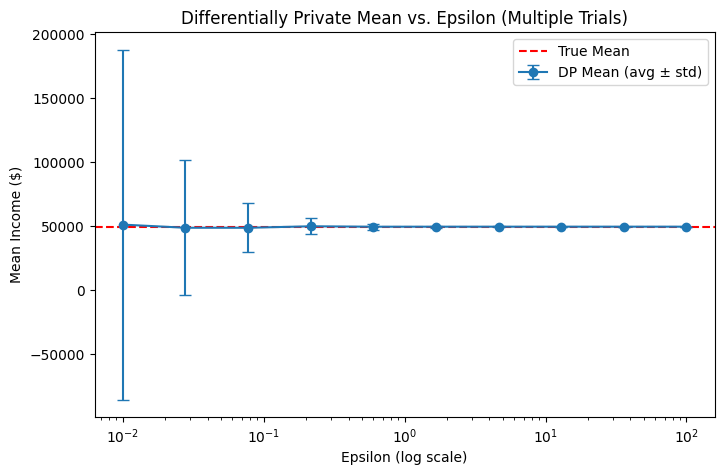

In [10]:
plt.figure(figsize=(8, 5))

# True mean line
plt.axhline(y=true_mean, color='r', linestyle='--', label="True Mean")

# Plot average DP means with error bars
plt.errorbar(epsilons, avg_dp_means, yerr=std_dp_means, 
             fmt='o-', capsize=4, label="DP Mean (avg ± std)")

# Use log scale on the x-axis (because we chose epsilons in log space)
plt.xscale("log")

plt.xlabel("Epsilon (log scale)")
plt.ylabel("Mean Income ($)")
plt.title("Differentially Private Mean vs. Epsilon (Multiple Trials)")
plt.legend()
plt.show()